In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd

import os
os.chdir("../")

def create_graph(df: pd.DataFrame, flag_show_mal: bool, src:str, dst:str, label:str):
    """
    Function to create a sample of graph that will be plotted.
    This function must be used only for sample graph creation. 

    :param df: dataframe with connections
    :param flag_show_mal: True->show different colour for hypothetical attackers and victims (not to be intended completely correct, it's just for showing
    :param src: source ip column name
    :param dst: destination ip column name
    :param label: binary label column name
    :return: graph with colour property
    """
    attackers = []
    victims = []
    edges_list = set([tuple(x) for x in df[[src, dst, label]].to_numpy()]) 
    
    if flag_show_mal:
        color_attacker = 'red'
        color_victim = 'green'
    else:
        color_attacker ='green'
        color_victim = 'green'

    colors = {}
    lista_dest_del_source = []

    src_dest = [[src, dest] for (src,dest,_) in edges_list]
    for [src,dest] in src_dest:
        if not src in lista_dest_del_source: 
            colors[src] = color_attacker 
            colors[dest] = color_victim
            lista_dest_del_source.append(dest)
            if flag_show_mal:
                attackers.append(src)
                victims.append(dest)
        else:
            colors[src] = color_victim
            colors[dest] = color_attacker

    G = nx.DiGraph()
    for elem in list(colors.keys()):
        G.add_node(elem, color=colors[elem])

    G.add_weighted_edges_from(edges_list, color='black')

    return G

def show_graph_bicolor(G: nx.DiGraph, save: bool):
    """
    Print on screen and on file if wanted a sample graph with colours to distinguish victims (green) and attackers (red)
    :param G: Graph with node colour property
    :param save: True-> print on file "graph_bicolour.pdf", False-> don't print on file
    :return: 
    """
    colors = [node[1]['color'] for node in G.nodes(data=True)]
    fig = plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, font_weight='bold', node_color=colors, node_size=250, font_size=14, font_color='black', width=2)
    plt.show()
    if save:
        fig.savefig('graph_bicolor.pdf', format='pdf', dpi=300)

def show_graph_monocolor(G: nx.DiGraph, save:bool, node_color='blue'):
    """
    Print on screen and on file if wanted a sample graph with uniform colour
    :param G: Graph
    :param save: True-> print on file "graph_bg.pdf", False-> don't print on file
    :param node_color: Color to be assigned to nodes
    :return: 
    """
    colors = [node_color for node in G.nodes(data=True)]
    fig = plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, font_weight='bold', node_color=colors, node_size=250, font_size=14, font_color='black', width=2)
    plt.show()
    if save:
        fig.savefig('graph_monocolor.pdf', format='pdf', dpi=300)        

In [3]:
from variables import user_CIC_dirname
from project_utils import load_and_etl_CIC_IDS_2017

dataset = load_and_etl_CIC_IDS_2017(user_CIC_dirname)[0]
src = 'Source_IP'
dst = 'Destination_IP'
label = 'Binary_Label'

n_connections = 30 # number of connections to be considered for graph creation

In [4]:
df = dataset[[src, dst, label]].sample(n_connections)
G = create_graph(df, True, src, dst, label)

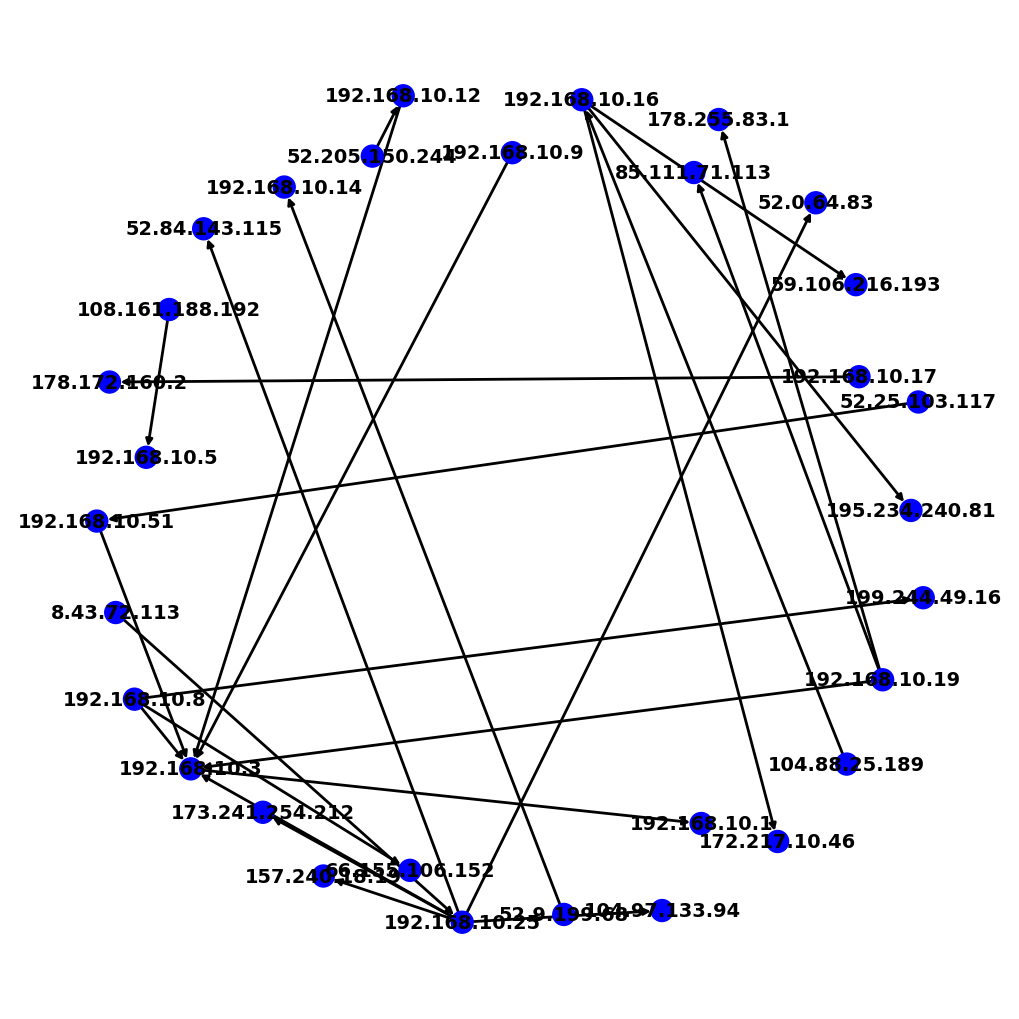

In [5]:
show_graph_monocolor(G, True, node_color='blue')

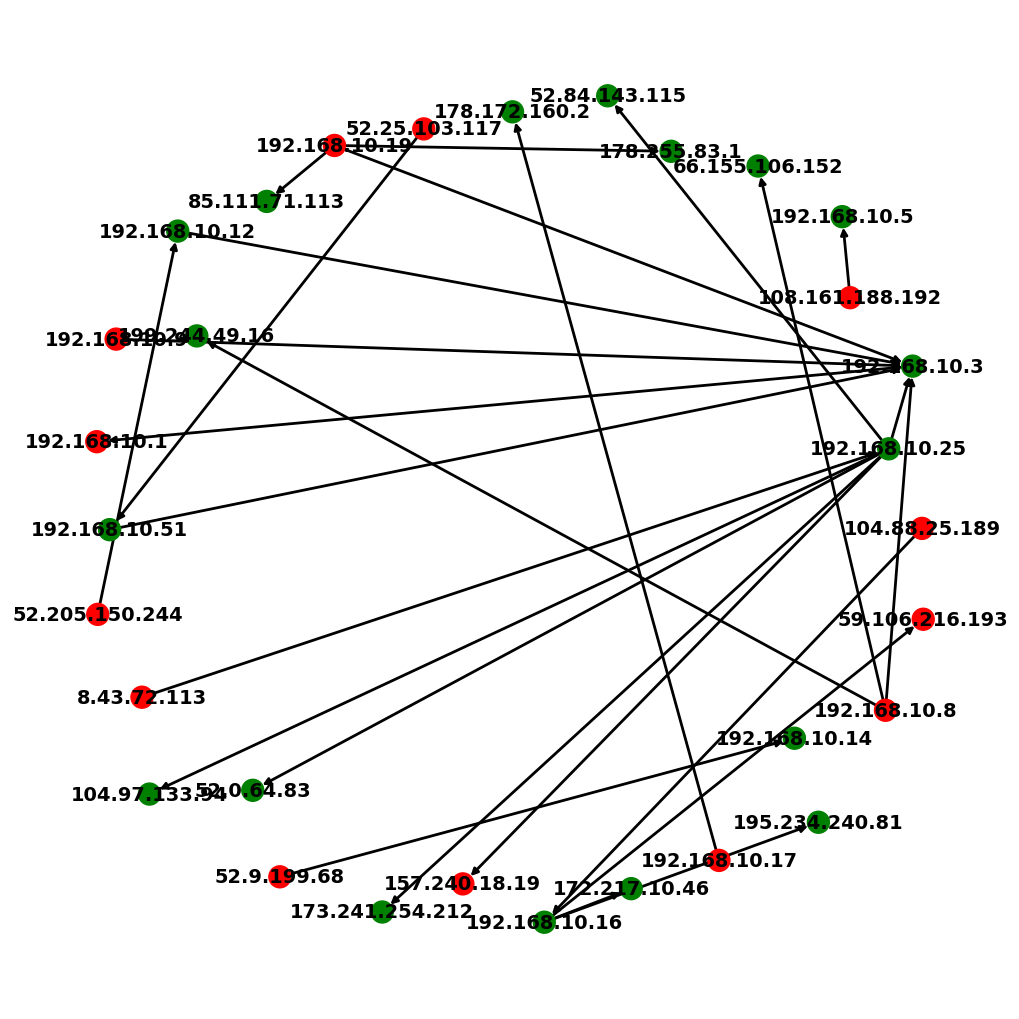

In [6]:
show_graph_bicolor(G, False)